In [1]:
# import libraries
import neuraltoolkit as ntk
import numpy as np
from matplotlib import pyplot as plt
import copy


In [2]:
rawfile = '/Users/gal4en/OneDrive/MEA/20190322.YH10/20190322_YH10_4_190322_174001.rhd'

In [3]:
rawfile


'/Users/gal4en/OneDrive/MEA/20190322.YH10/20190322_YH10_4_190322_174001.rhd'

In [4]:
# Get number of channels
print("Enter total number of channels : ")
number_of_channels = np.int16(eval(input()))

Enter total number of channels : 
32


In [5]:
# Time and data
t, dgc = ntk.load_intan_raw_gain_chanmap(rawfile, number_of_channels, 'linear')


Reading Intan Technologies RHD2000 Data File, Version 1.5

n signal groups 7
Found 32 amplifier channels.
Found 3 auxiliary input channels.
Found 1 supply voltage channel.
Found 0 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 46.502 seconds of data.  Amplifiers were sampled at 25.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 13.1 seconds
linear


In [6]:
# bandpass filter
bdgc = ntk.butter_bandpass(dgc, 500, 7500, 25000, 3)

In [7]:
temp = copy.deepcopy(bdgc[14,:])

In [8]:
thresh = -25

In [9]:
# binarize your data so that points above thresh are 0, and points below thresh
# are 1.
temp[temp>-25] = 0
temp[temp!=0] = 1

In [10]:
# get the differential of the binarized signal. and place that this is 1, you 
# have a threshold crossing in the right direction
dtemp = np.diff(temp)

In [11]:
crossings = np.where(dtemp ==1)

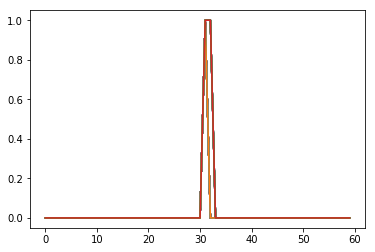

In [12]:
spks = []

for c in crossings[0]:

    stemp = temp[c-30:c+30]

    spks.append(stemp)
    
for s in spks:
    plt.plot(s)
